An Obesity machine Learning model that attempts to predict the category of weight of an individual using data across a number of dimensions(weight,height,BMI)

In [66]:
#Our Imports(dependents)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
#our data
data = pd.read_csv('/content/obesity_data.csv')
data.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [4]:
#summary statistics for numerical dimensions
data.describe()

,Age,Height,Weight,BMI,PhysicalActivityLevel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,170.052417,71.205769,24.888317,2.534000
std,18.114267,10.309971,15.509849,6.193912,1.116284
min,18.000000,136.115719,26.065730,8.470572,1.000000
25%,35.000000,163.514205,61.129629,20.918068,2.000000
50%,50.000000,169.801665,71.929072,24.698647,3.000000
75%,66.000000,177.353596,81.133746,28.732132,4.000000
max,79.000000,201.419670,118.907366,50.791898,4.000000


In [10]:
#Summary statistics for categorical dimensions
data.ObesityCategory.describe()

count              1000
unique                4
top       Normal weight
freq                371
Name: ObesityCategory, dtype: object

In [12]:
data.Gender.value_counts()

Male      523
Female    477
Name: Gender, dtype: int64

<Axes: xlabel='PhysicalActivityLevel', ylabel='count'>

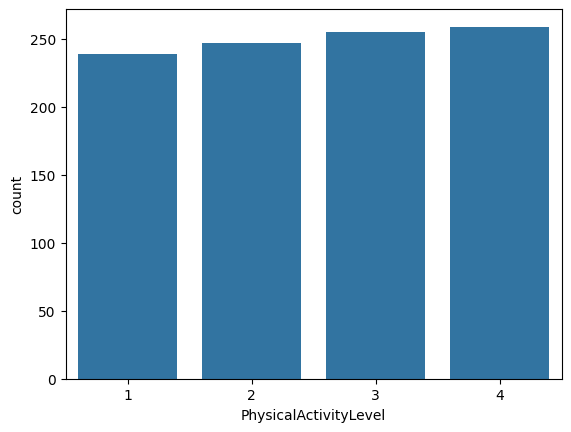

In [14]:
sns.countplot(x='PhysicalActivityLevel',data=data)

<Axes: xlabel='ObesityCategory', ylabel='count'>

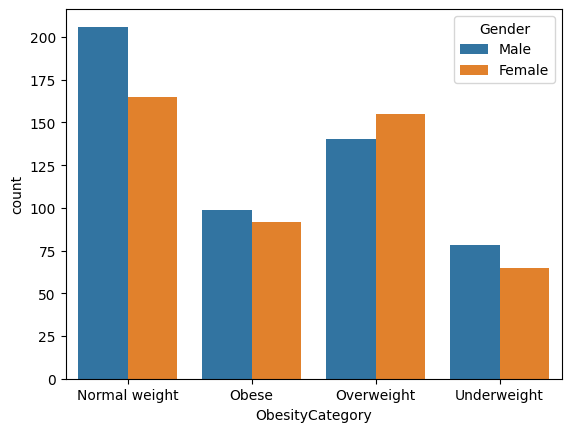

In [24]:
sns.countplot(x='ObesityCategory',data=data,hue='Gender')

<Figure size 1000x800 with 0 Axes>

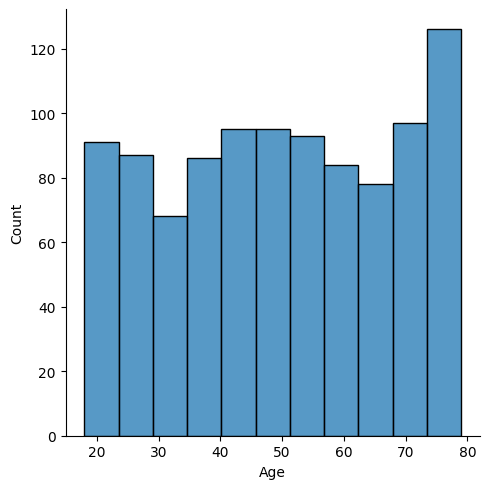

In [22]:
#age Distribution
plt.figure(figsize=(10,8))
sns.displot(x="Age",data=data)

In [26]:
data.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


Data PreProcessing

In [28]:
#Replacing text categorical values with numerals
data.replace({'Gender': {'Male': 1,'Female': 0}},inplace=True)
data.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,1,173.575262,71.982051,23.891783,4,Normal weight
1,69,1,164.127306,89.959256,33.395209,2,Obese
2,46,0,168.072202,72.930629,25.817737,4,Overweight
3,32,1,168.459633,84.886912,29.912247,3,Overweight
4,60,1,183.568568,69.038945,20.487903,3,Normal weight


In [30]:
#Replacing text categorical values with numerals
data.replace({'ObesityCategory': {'Underweight': 0,'Normal weight': 1,'Overweight': 2,'Obese': 3}},inplace=True)
data.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,1,173.575262,71.982051,23.891783,4,1
1,69,1,164.127306,89.959256,33.395209,2,3
2,46,0,168.072202,72.930629,25.817737,4,2
3,32,1,168.459633,84.886912,29.912247,3,2
4,60,1,183.568568,69.038945,20.487903,3,1


In [61]:
X  = data.drop('ObesityCategory',axis=1)
y = data['ObesityCategory']

In [62]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [63]:
#Scaling our Data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
print(y.shape, y_train.shape, y_test.shape)

(1000,) (670,) (330,)


In [65]:
print(X.shape, X_train.shape, X_test.shape)

(1000, 6) (670, 6) (330, 6)


In [67]:
#Our machine Learning Model
model = LogisticRegression()

In [68]:
#model Training
model.fit(X_train,y_train)

LogisticRegression()

In [69]:
#Model prediction on the training set and its accuracy to Check for Over fitting
train_prediction = model.predict(X_train)
print(accuracy_score(train_prediction,y_train))

0.9761194029850746


In [73]:
#Model prediction on the Test data and its accuracy Score
prediction = model.predict(X_test)
print( accuracy_score(prediction,y_test))

0.9606060606060606


In [80]:
data.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,1,173.575262,71.982051,23.891783,4,1
1,69,1,164.127306,89.959256,33.395209,2,3
2,46,0,168.072202,72.930629,25.817737,4,2
3,32,1,168.459633,84.886912,29.912247,3,2
4,60,1,183.568568,69.038945,20.487903,3,1


In [87]:
def ObesityCheck():
  #collect user data
  Age = int(input('insert your age: '))
  Gender = int(input('insert your Gender(Male(1) /Female(0)): '))
  Height = int(input('insert your height(cm): '))
  Weight = int(input('insert your weight(kg): '))
  BMI =  float(input("insert your BMI: "))
  PhysicalActivityLevel =  int(input("insert your Physical activity level(1-4): "))

  #creating a Dataframe with our data
  my_data = [Age, Gender, Height, Weight, BMI, PhysicalActivityLevel]
  frame = {'Age': Age, 'Gender': Gender, 'Height': Height, 'Weight': Weight,
           'BMI': BMI, 'PhysicalActivityLevel': PhysicalActivityLevel}
  ind = [0]
  your_data = pd.DataFrame(frame,index=ind)

  #Scaling our data
  your_data = scaler.transform(your_data)

  #getting  a prediction
  your_pred = model.predict(your_data)
  print(f'your Obesity prediction is {your_pred}')
  print('\n')
  print('Where - Underweight: 0, Normal weight :  1, Overweight : 2,  Obese : 3}')

In [88]:
#Obesity Check Using my own Data
ObesityCheck()


insert your age: 27
insert your Gender(Male(1) /Female(0)): 1
insert your height(cm): 193
insert your weight(kg): 85
insert your BMI: 22.8
insert your Physical activity level(1-4): 4
your Obesity prediction is [1]


Where - Underweight: 0, Normal weight :  1, Overweight : 2,  Obese : 3}
